<a href="https://colab.research.google.com/github/JosueAfouda/TUTORIALS/blob/main/data_drift_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Détection de la dérive des données**

**Dérive des données** : Elle se produit lorsqu'il y a un changement dans les propriétés statistiques des variables utilisées comme caractéristiques. Par exemple, si l'âge est une caractéristique utilisée dans le modèle, mais que seules des données pour les 16-24 ans sont disponibles pendant l'entraînement, et que le système commence ensuite à ingérer des données pour un groupe d'âge plus large, une dérive des données se produit.

In [1]:
#pip install alibi

In [2]:
#pip install alibi-detect

In [3]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import alibi
from alibi_detect.cd import TabularDrift

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importation des données
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

In [5]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
X.shape

(178, 13)

In [8]:
y.shape

(178,)

In [11]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
# Données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(133, 13) (133,) (45, 13) (45,)


## Visualisation des données

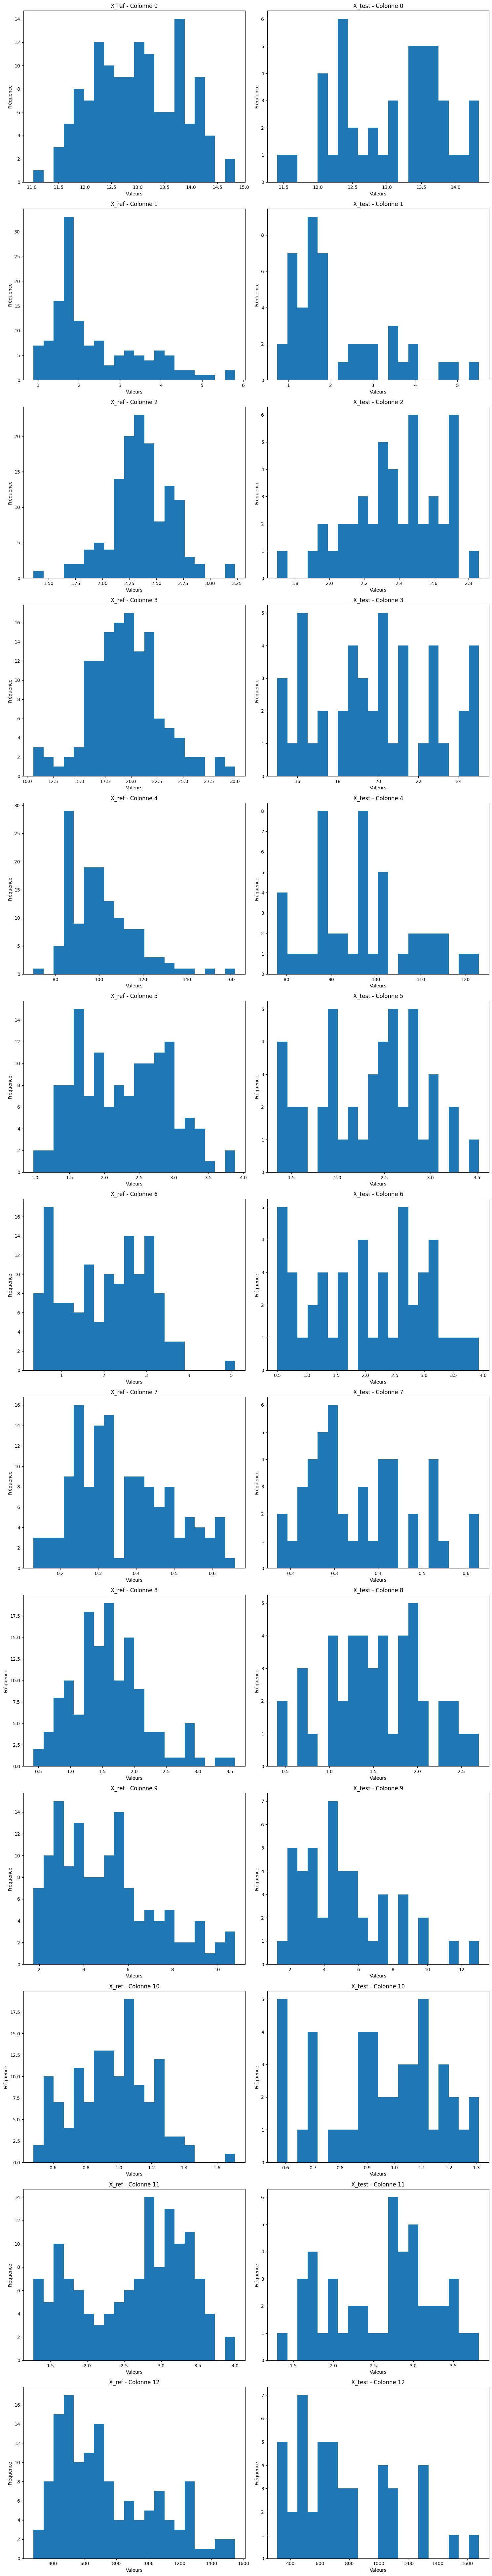

In [10]:
# Nombre de colonnes dans X_ref et X_test
X_ref = X_train
num_cols = X_ref.shape[1]

# Créer une figure avec deux sous-graphiques côte à côte
fig, axs = plt.subplots(num_cols, 2, figsize=(15, 6*num_cols))

# Tracer l'histogramme de chaque colonne pour X_ref
for i in range(num_cols):
    axs[i, 0].hist(X_ref[:, i], bins=20)
    axs[i, 0].set_title('X_ref - Colonne {}'.format(i))
    axs[i, 0].set_xlabel('Valeurs')
    axs[i, 0].set_ylabel('Fréquence')

# Tracer l'histogramme de chaque colonne pour X_test
for i in range(num_cols):
    axs[i, 1].hist(X_test[:, i], bins=20)
    axs[i, 1].set_title('X_test - Colonne {}'.format(i))
    axs[i, 1].set_xlabel('Valeurs')
    axs[i, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

## Est-ce qu'il y a une dérive dans les données de test ?

In [12]:
cd  = TabularDrift(X_ref, p_val = 0.05)
cd

/usr/local/lib/python3.10/dist-packages/alibi_detect/cd/tabular.py:113: UserWarning: No `categories_per_feature` dict provided so all features are assumed to be numerical. `KSDrift` will be applied to all features.
  warnings.warn('No `categories_per_feature` dict provided so all features are assumed to be numerical. '


TabularDrift

La ligne de code `cd = TabularDrift(X_ref, p_val=.05 )` crée une instance de la classe `TabularDrift` pour détecter la dérive dans les données tabulaires. Explorons cette ligne en détail et l'impact du choix de la valeur p (p-value) sur le résultat :

- `cd`: C'est le nom de la variable qui stockera l'instance de la classe `TabularDrift`. Cette instance sera utilisée pour détecter la dérive dans les données.

- `TabularDrift`: C'est la classe utilisée pour détecter la dérive dans les données tabulaires. Elle fait partie du module `alibi_detect.cd` de la bibliothèque `alibi_detect`.

- `X_ref`: C'est l'ensemble de référence de données utilisé pour détecter la dérive. Ces données serviront de point de comparaison pour les données de test afin de déterminer s'il y a eu un changement significatif.

- `p_val`: Il s'agit du seuil de signification utilisé pour tester si la dérive détectée est statistiquement significative. La valeur p est un nombre compris entre 0 et 1, où une valeur plus faible indique un seuil de signification plus strict. Dans cet exemple, la valeur p est fixée à 0.05, ce qui est une valeur couramment utilisée dans la pratique pour les tests de signification. Cela signifie que si la valeur p calculée lors de la détection de dérive est inférieure à 0.05, la dérive est considérée comme statistiquement significative.

L'impact du choix de la valeur p sur le résultat est important car cela détermine la sensibilité de la détection de dérive. Une valeur p plus faible rend la détection de dérive plus stricte, ce qui signifie qu'elle nécessite des preuves statistiques plus solides pour conclure qu'une dérive est présente. En revanche, une valeur p plus élevée rend la détection de dérive moins stricte, ce qui peut conduire à une détection de dérive même dans des cas où la différence observée entre les données de référence et les données de test n'est pas statistiquement significative.

En résumé, le choix de la valeur p dans la détection de dérive contrôle le niveau de risque de fausses détections de dérive (erreurs de type I) et de fausses non-détections de dérive (erreurs de type II). Une valeur p appropriée doit être choisie en fonction des exigences de l'application et du contexte spécifique de l'analyse des données.

In [13]:
type(cd)

alibi_detect.cd.tabular.TabularDrift

In [14]:
preds = cd.predict(X_test)
preds

{'data': {'is_drift': 0,
  'distance': array([0.17276524, 0.1829574 , 0.11361738, 0.08705096, 0.1390142 ,
         0.16123642, 0.05864662, 0.07067669, 0.08487886, 0.07318296,
         0.05680869, 0.11345029, 0.07084378], dtype=float32),
  'p_val': array([0.23365112, 0.18112348, 0.7300993 , 0.93911326, 0.48439223,
         0.3058979 , 0.9993302 , 0.9911801 , 0.9497265 , 0.9870494 ,
         0.9996109 , 0.73171264, 0.9909397 ], dtype=float32),
  'threshold': 0.0038461538461538464},
 'meta': {'name': 'TabularDrift',
  'online': False,
  'data_type': None,
  'version': '0.11.5',
  'detector_type': 'drift'}}

```python
preds = cd.predict(X_test)
```
   - Cette ligne utilise l'instance `cd` pour prédire si une dérive est présente dans les données de test `X_test`. Les prédictions sont stockées dans la variable `preds`.

   - Si `is_drift` est égal à 0, cela signifie qu'aucune dérive n'a été détectée, et si c'est égal à 1, cela signifie qu'une dérive a été détectée.